In [69]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [70]:
df_all = pd.read_csv('../Processed Data/AllPlayerDataProcessed.csv').drop(columns=['Index'])
df_gk = pd.read_csv('../Processed Data/GKDataProcessed.csv').drop(columns=['Index'])
df_bk = pd.read_csv('../Processed Data/BKDataProcessed.csv').drop(columns=['Index'])
df_md = pd.read_csv('../Processed Data/MDDataProcessed.csv').drop(columns=['Index'])
df_fwd = pd.read_csv('../Processed Data/FWDDataProcessed.csv').drop(columns=['Index'])
# df = df_all
# df.head()

In [71]:
# Shape of dataframe
# print(" Shape of dataframe: ", df.shape)
# Variable inspection
# print("Names of columns ", list(df.columns))

In [72]:
# Training the linear regression model for goalkeepers
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_gk.Overall
df_gk = df_gk.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test_gk = train_test_split(df_gk, target, test_size=0.2)

# Model for goalkeepers
GKmodel = LinearRegression()
GKmodel.fit(X_train, y_train)
predictions_gk = GKmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test_gk, predictions_gk)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test_gk, predictions_gk))))

r2 score: 0.9980869314117549
RMSE : 0.342093811618944


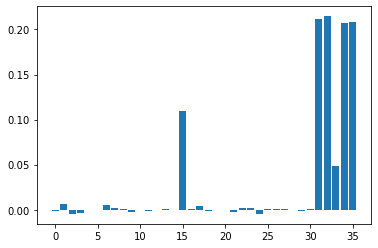

In [73]:
Y = GKmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_gk), Y))
# print(coefs_attr)

In [74]:
# Training the linear regression model for backfielders
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_bk.Overall
df_bk = df_bk.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test_bk = train_test_split(df_bk, target, test_size=0.2)

# Model for midfielders
BKmodel = LinearRegression()
BKmodel.fit(X_train, y_train)
predictions_bk = BKmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test_bk, predictions_bk)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test_bk, predictions_bk))))

r2 score: 0.9625495152476835
RMSE : 1.2477112038040525


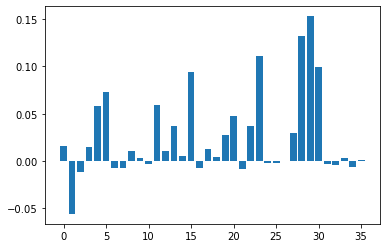

In [75]:
Y = BKmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_bk), Y))
# print(coefs_attr)

In [76]:
# Training the linear regression model for midfielders
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_md.Overall
df_md = df_md.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test_md = train_test_split(df_md, target, test_size=0.2)

# Model for midfielders
MDmodel = LinearRegression()
MDmodel.fit(X_train, y_train)
predictions_md = MDmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test_md, predictions_md)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test_md, predictions_md))))

r2 score: 0.9293896531343753
RMSE : 1.867512676214284


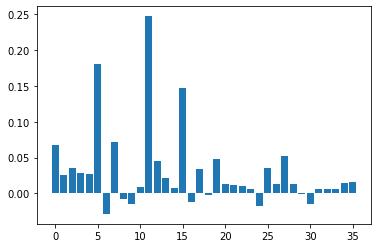

In [77]:
Y = MDmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_md), Y))
# print(coefs_attr)

In [78]:
# Training the linear regression model for strikers / forwards
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_fwd.Overall
df_fwd = df_fwd.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test_fwd = train_test_split(df_fwd, target, test_size=0.2)

# Model for strikers
FWDmodel = LinearRegression()
FWDmodel.fit(X_train, y_train)
predictions_fwd = FWDmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test_fwd, predictions_fwd)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test_fwd, predictions_fwd))))

r2 score: 0.9893822180361279
RMSE : 0.7409584669820498


{'Age': -0.0039877316538253025, 'Weak Foot': 0.031551051000257735, 'Crossing': -0.0013774017841239287, 'Finishing': 0.1724363756583631, 'HeadingAccuracy': 0.06725072185169245, 'ShortPassing': 0.05801444640650133, 'Volleys': 0.007595406718658259, 'Dribbling': 0.07610162186366146, 'Curve': 0.0020040658834300077, 'FKAccuracy': -0.0002086499475904005, 'LongPassing': 0.003361195839020424, 'BallControl': 0.12061846700367528, 'Acceleration': 0.039182551093236165, 'SprintSpeed': 0.044142253234923635, 'Agility': -0.003036315165158294, 'Reactions': 0.08787081405651416, 'Balance': -0.0025265689356633162, 'ShotPower': 0.09306834472494123, 'Jumping': -0.0012281846455053378, 'Stamina': -3.4635053570452886e-05, 'Strength': 0.0470623926764848, 'LongShots': 0.03328163727286235, 'Aggression': 0.0025086880276211816, 'Interceptions': -0.003653117390322729, 'Positioning': 0.13558359876280565, 'Vision': 0.00663428302022104, 'Penalties': 0.0029720822333486863, 'Composure': 0.00962063093695576, 'Marking': 0.0

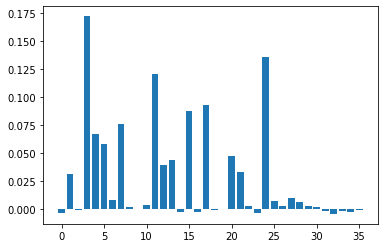

In [79]:
Y = FWDmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_fwd), Y))
print(coefs_attr)

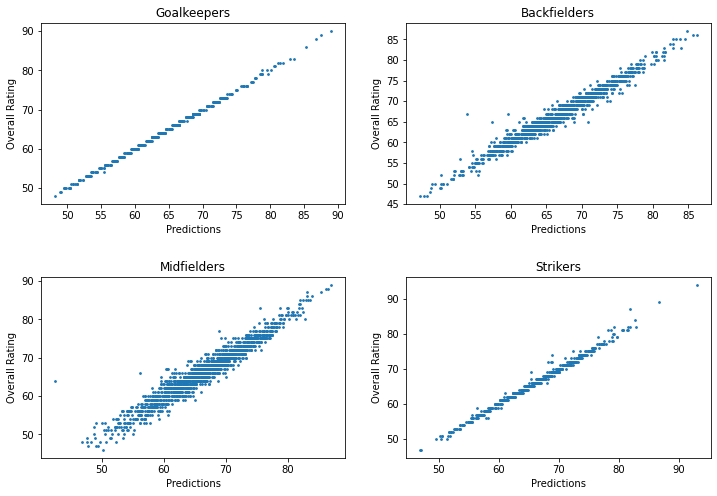

In [80]:
# Plotting each results
figs = plt.figure(figsize=(12,8))
fig_gk = figs.add_subplot(2,2,1)
fig_gk.scatter(predictions_gk, y_test_gk, s = 3)
fig_gk.set_title("Goalkeepers")
fig_gk.set_xlabel("Predictions")
fig_gk.set_ylabel("Overall Rating")
fig_bk = figs.add_subplot(2,2,2)
fig_bk.scatter(predictions_bk, y_test_bk, s = 3)
fig_bk.set_title("Backfielders")
fig_bk.set_xlabel("Predictions")
fig_bk.set_ylabel("Overall Rating")
fig_md = figs.add_subplot(2,2,3)
fig_md.scatter(predictions_md, y_test_md, s = 3)
fig_md.set_title("Midfielders")
fig_md.set_xlabel("Predictions")
fig_md.set_ylabel("Overall Rating")
fig_fwd = figs.add_subplot(2,2,4)
fig_fwd.scatter(predictions_fwd, y_test_fwd, s = 3)
fig_fwd.set_title("Strikers")
fig_fwd.set_xlabel("Predictions")
fig_fwd.set_ylabel("Overall Rating")
figs.subplots_adjust(hspace=0.4)
figs.show()

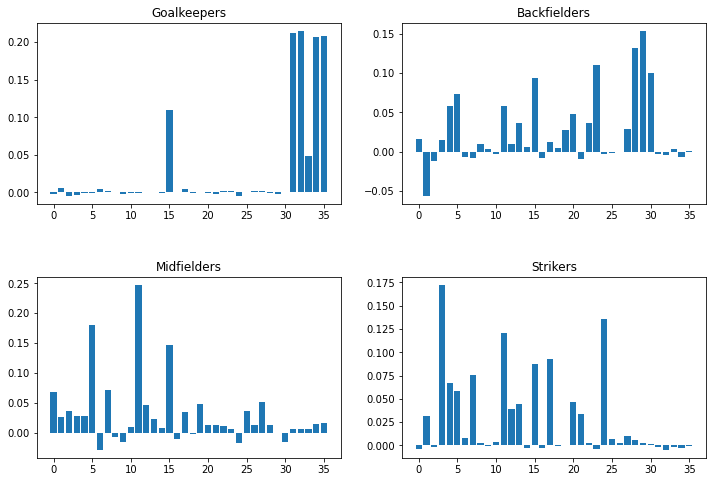

In [81]:
# Plotting coefficients for each model
figs = plt.figure(figsize=(12,8))
fig_gk = figs.add_subplot(2,2,1)
fig_gk.bar(range(len(GKmodel.coef_)),GKmodel.coef_)
fig_gk.set_title("Goalkeepers")
fig_bk = figs.add_subplot(2,2,2)
fig_bk.bar(range(len(BKmodel.coef_)),BKmodel.coef_)
fig_bk.set_title("Backfielders")
fig_md = figs.add_subplot(2,2,3)
fig_md.bar(range(len(MDmodel.coef_)),MDmodel.coef_)
fig_md.set_title("Midfielders")
fig_fwd = figs.add_subplot(2,2,4)
fig_fwd.bar(range(len(FWDmodel.coef_)),FWDmodel.coef_)
fig_fwd.set_title("Strikers")
figs.subplots_adjust(hspace=0.4)
figs.show()

In [82]:
# Analyzing the coefficients of midfielders
import heapq
md_coef = MDmodel.coef_
print(md_coef)
max_ind = heapq.nlargest(5, range(len(md_coef)), md_coef.__getitem__)
print(df_md.columns[max_ind])
print(md_coef[max_ind])
#print(MDmodel.coef_)

[ 6.81805857e-02  2.60126425e-02  3.60838287e-02  2.81007860e-02
  2.68762336e-02  1.80845520e-01 -2.85261211e-02  7.18428154e-02
 -7.33764231e-03 -1.53159305e-02  8.91209349e-03  2.47304348e-01
  4.56528360e-02  2.19671046e-02  8.11981394e-03  1.47247053e-01
 -1.13051237e-02  3.43784479e-02 -1.68214646e-03  4.82238257e-02
  1.33227583e-02  1.23922265e-02  1.04104231e-02  5.93322309e-03
 -1.68631594e-02  3.60768086e-02  1.29146828e-02  5.16153741e-02
  1.28206052e-02 -1.87170413e-04 -1.53549354e-02  6.08682030e-03
  6.59001175e-03  5.70245692e-03  1.41287590e-02  1.54041443e-02]
Index(['BallControl', 'ShortPassing', 'Reactions', 'Dribbling', 'Age'], dtype='object')
[0.24730435 0.18084552 0.14724705 0.07184282 0.06818059]
